# 3-1. 내 모델은 얼마나 똑똑한가? 다양하게 평가해 보기 (1) 정확도에는 함정이 있다

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [8]:
digits_data = digits.data
digits_data.shape

(1797, 64)

In [9]:
# Sample 확인
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

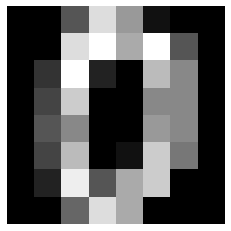

In [14]:
# 이미지 확인해보기

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray') # reshape 이유는 일렬 벡터를 다시 평면화
plt.axis('off')
plt.show()

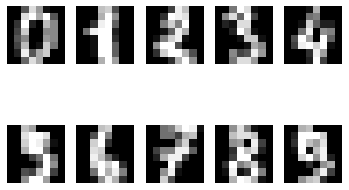

In [16]:
# 이미지 여러 개 확인

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [17]:
# 타겟(라벨) 확인

digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
# 다만 이번에는 정확도의 함정을 확인하는 실험이기 때문에 약간의 장치를 넣어볼 것입니다. 숫자 10개를 모두 분류하는 것이 아니라, 해당 이미지 데이터가 3인지 아닌지를 맞히는 문제로 변형해서 풀어보는 것입니다. 즉 입력된 데이터가 3이라면 3을, 3이 아닌 다른 숫자라면 0을 출력하도록 하는 모델을 생각해 보겠습니다.

new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

In [26]:
## DJ's practice

test_label = []

for i in digits_label:
    if i == 3:
        test_label.append(3)
    else:
        test_label.append(0)

print(len(test_label))

1797


## DecisionTree 모델로 학습 및 평가하기

In [31]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(digits_data,
                                                   new_label,
                                                   test_size=0.2,
                                                   random_state=15)

print('X_train coutns:', len(X_train), 'X_test counts:', len(X_test))
print('digits_data의 타입은:', type(digits_data))

X_train coutns: 1437 X_test counts: 360
digits_data의 타입은: <class 'numpy.ndarray'>


In [46]:
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=32, splitter='best')

In [47]:
Y_pred = decision_tree.predict(X_test)
Y_pred

array([3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0,

In [48]:
print(Y_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 

In [49]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(Y_test, Y_pred)
test_accuracy

0.9361111111111111

In [52]:
# 어차피 0이 90%여서 0만 넣어도 확률은 90% 이상 나옴. 이런 fake를 증명해보기

fake_pred = [0] * len(Y_pred)

accuracy = accuracy_score(Y_test, fake_pred)
accuracy

0.925

# Confusion matrix 로 정확도 판단

In [65]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, Y_pred)
# 해석하면 맨 위 오른쪽에서부터 시계방향으로, True Positives, False Negatives, True Negatives, False Positives

array([[319,  14],
       [  9,  18]])

In [66]:
confusion_matrix(Y_test, fake_pred)
# 해석하면 : 0값을 Positive로 다 놨기 때문에 Negative는 없음

array([[333,   0],
       [ 27,   0]])

In [60]:
# Precision, Recall, F1 score 확인
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.56      0.67      0.61        27

    accuracy                           0.94       360
   macro avg       0.77      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



In [62]:
print(classification_report(Y_test, fake_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       333
           3       0.00      0.00      0.00        27

    accuracy                           0.93       360
   macro avg       0.46      0.50      0.48       360
weighted avg       0.86      0.93      0.89       360



/Users/Jinmi/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
accuracy_score(Y_test, Y_pred), accuracy_score(Y_test, fake_pred)

(0.9361111111111111, 0.925)

# 3-3. 데이터가 달라도 문제 없어요!

In [68]:
from sklearn.datasets import load_wine

wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [69]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [70]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [74]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
bc

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [76]:
bc.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [83]:
print(bc.feature_names)
print()
print(len(bc.feature_names))
print(bc.data.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

30
(569, 30)


In [79]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

## 3-4. 프로젝트 `load_breast_cancer` : 유방암 여부를 진단해 봅시다

In [84]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

print("슝~")

슝~


In [85]:
# 데이터 불러오기
bc = load_breast_cancer()
print(type(dir(bc)))  

#bc에 어떤 정보들이 담겨있는지 확인하기
print("bc에 담겨진 정보 : ", bc.keys())

<class 'list'>
bc에 담겨진 정보 :  dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [92]:
#Feature Data 지정하기
bc_data = bc.data

#bc_data 크기 확인해보기(배열의 형상정보 출력하기)
print(bc.data.shape)

#샘플로 bc_data에서 하나의 데이터만 확인해 보기)
print(bc_data[0])

(569, 30)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [93]:
bc_label = bc.target
print(bc_label.shape)
print(bc_label)

#라벨의 이름을 출력해 봅시다. 
print(bc.target_names)
# benign : (of a disease) not harmful in effect.
# malignant : (of a disease) very virulent or infectious.

#데이터의 설명이 담겨있는 변수를 출력해 봅시다. 
print(bc.DESCR)

#feature에 대한 설명이 담긴 변수를 출력해 봅시다. 
print(bc.feature_names)

# 데이터셋 파일이 저장된 경로를 출력해 봅시다. 
print(bc.filename)

(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0

In [94]:
#pd라는 약어로 판다스 사용하기
import pandas as pd

#판다스 버전 출력하기
print(pd.__version__)

0.25.1


In [97]:
#유방암 데이터셋을 pandas가 제공하는 DataFrame이라는 자료형으로 변환하기 
bc_df = pd.DataFrame(bc_data, columns=bc.feature_names)
bc_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [98]:
#정답 데이터를 `label` 이라는 컬럼으로 추가 해 주기 
bc_df['label'] = bc_label
bc_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [104]:
# sklearn.model_selection 패키지의 train_test_split을 활용
from sklearn.model_selection import train_test_split

# trainig dataset과 test dataset을 간단히 분리해 봅시다.
X_train, X_test, y_train, y_test = train_test_split(bc_df.iloc[:,:-2],
                                                   bc_df.iloc[:,:-1],
                                                   test_size=0.2,
                                                   random_state=7)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
print('y_train 개수: ', len(y_train),', y_test 개수: ', len(y_test))

X_train 개수:  455 , X_test 개수:  114
y_train 개수:  455 , y_test 개수:  114


In [118]:
# sklearn.model_selection 패키지의 train_test_split을 활용
from sklearn.model_selection import train_test_split

# trainig dataset과 test dataset을 간단히 분리해 봅시다.
X_train, X_test, y_train, y_test = train_test_split(bc_data,
                                                   bc_label,
                                                   test_size=0.2,
                                                   random_state=7)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
print('y_train 개수: ', len(y_train),', y_test 개수: ', len(y_test))

X_train 개수:  455 , X_test 개수:  114
y_train 개수:  455 , y_test 개수:  114


#### 1. Decision Tree 사용해 보기

In [119]:
#사이킷런의 의사결정트리를 import 합니다. 
from sklearn.tree import DecisionTreeClassifier

#의사결정 트리를 선언합니다. 
decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

#훈련데이터로 의사결정트리를 학습합니다. 
decision_tree.fit(X_train, y_train)

classifier


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=32, splitter='best')

#### 2. Random Forest 사용해 보기

In [121]:
#사이킷런의 랜덤포레스트를 import 합니다. 
from sklearn.ensemble import RandomForestClassifier

#랜덤 포레스트를 생성합니다. 
random_forest = RandomForestClassifier()
print(random_forest._estimator_type)

#훈련데이터로 랜덤포레스트를 학습합니다. 
random_forest.fit(X_train, y_train)

classifier


/Users/Jinmi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### 3. SVM 사용해 보기

In [125]:
#사이킷런의 svm을 import 합니다. 
from sklearn import svm

#svm을 생성합니다.
svm_model = svm.SVC()
print(svm_model._estimator_type)

#훈련데이터로 svm분류모델을 학습합니다. 
svm_model.fit(X_train, y_train)

classifier


/Users/Jinmi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### 4. SGD Classifier 사용해 보기

In [126]:
#사이킷런의 SGD Classifier 모델을 import 합니다. 
from sklearn.linear_model import SGDClassifier

#sgd classifier를 생성합니다. 
sgd_model = SGDClassifier()
print(sgd_model._estimator_type)

#훈련데이터로 SGC분류기를 학습합니다. 
sgd_model.fit(X_train, y_train)

classifier


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

#### 5. Logistic Regression 사용해 보기

In [128]:
#사이킷런의 로지스틱 회귀를 import 합니다. 
from sklearn.linear_model import LogisticRegression

#의사결정 트리를 선언합니다. 
logistic_model = LogisticRegression()
print(logistic_model._estimator_type)

#훈련데이터로 로지스틱 회귀를 학습합니다. 
logistic_model.fit(X_train, y_train)

classifier


/Users/Jinmi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## 모델 평가하기

In [131]:
# 예시로 Decision Tree

#모델의 predict 함수를 이용해서 X_test를 예측해 주세요 
y_pred = decision_tree.predict(X_test)
print(y_pred)

# sklearn.metrics의 accuaracy_score함수를 import 해 주세요
from sklearn.metrics import accuracy_score

#y_test 와  y_pred를 인자로 넣어 정확도를 구해 주세요
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1]
0.9122807017543859


In [135]:
# 5개 모델 한번에 평가하기

model_list = [decision_tree, random_forest, svm_model, sgd_model, logistic_model]
y_pred_list = []

for model in model_list:
    y_pred_list.append(model.predict(X_test))

acc_list = []
for prediction in y_pred_list:
    acc_list.append(accuracy_score(y_test, prediction))

print(acc_list)

[0.9122807017543859, 0.9649122807017544, 0.6491228070175439, 0.8245614035087719, 0.9473684210526315]


In [139]:
# Recall 구해보기
from sklearn.metrics import classification_report

model_list = [decision_tree, random_forest, svm_model, sgd_model, logistic_model]
y_pred_list = []

for model in model_list:
    y_pred_list.append(model.predict(X_test))

i = 1
for prediction in y_pred_list:
    print(classification_report(y_test, prediction))
    print(i,"번째 모델")
    print()
    i += 1

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114

1 번째 모델

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        40
           1       0.95      1.00      0.97        74

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

2 번째 모델

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.65      1.00      0.79        74

    accuracy                           0.65       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.42      0.65      0.51       114

3

/Users/Jinmi/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
